# Goal: Figure out why it's not working to compute differences of dataframes using the method in my `averted` function

In [1]:
import pandas as pd, numpy as np
import vivarium_output_loader as vol
import lsff_output_processing as lop

!whoami
!date

ndbs
Fri Nov 13 12:11:32 PST 2020


In [2]:
%load_ext autoreload
%autoreload 2

## 1. Define output directories and load count space data

In [3]:
base_directory = '/share/costeffectiveness/results/vivarium_conic_lsff'
locations_rundates = {
    'India': '2020_06_26_20_35_00',
    'Nigeria': '2020_06_26_20_28_27',
    'Ethiopia': '2020_06_28_12_40_56',
}
locations_paths = vol.locaction_paths_from_rundates(base_directory, locations_rundates)

# Load a separate dictionary for each country
data = vol.load_count_data_by_location(locations_paths)
data.keys()

dict_keys(['India', 'Nigeria', 'Ethiopia'])

In [4]:
# View the table names for one of the countries (they should be the same for all)
data['India'].keys()

dict_keys(['gestational_age', 'transition_count', 'hemoglobin_level', 'deaths', 'state_person_time', 'anemia_state_person_time', 'births_with_ntd', 'population', 'person_time', 'ylls', 'ylds', 'births', 'birth_weight'])

In [5]:
# View the yll table
data['India']['ylls'].head()

,year,age_group,cause,folic_acid_fortification_group,vitamin_a_fortification_group,measure,input_draw,scenario,value
0,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,baseline,0.0
1,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,folic_acid_fortification_scale_up,0.0
2,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,iron_folic_acid_fortification_scale_up,0.0
3,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,vitamin_a_fortification_scale_up,0.0
4,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,29,baseline,0.0


In [6]:
# Merge the data for all locations into a single dictionary of dataframes
all_data = vol.merge_location_count_data(data)
all_data.keys()

dict_keys(['gestational_age', 'transition_count', 'hemoglobin_level', 'deaths', 'state_person_time', 'anemia_state_person_time', 'births_with_ntd', 'population', 'person_time', 'ylls', 'ylds', 'births', 'birth_weight'])

In [7]:
# Compare yll table with the one above
all_data['ylls'].head()

,location,year,age_group,cause,folic_acid_fortification_group,vitamin_a_fortification_group,measure,input_draw,scenario,value
0,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,baseline,0.0
1,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,folic_acid_fortification_scale_up,0.0
2,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,iron_folic_acid_fortification_scale_up,0.0
3,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,21,vitamin_a_fortification_scale_up,0.0
4,India,2020,1_to_4,diarrheal_diseases,covered,covered,ylls,29,baseline,0.0


## 2. Check iron effect on birthweight

It looks like the `'unknown'` category is missing from the iron fortification groups in the `birth_weight` dataframe.

In [8]:
all_data['births'].head()

,location,year,sex,folic_acid_fortification_group,measure,input_draw,scenario,value
0,India,2020,female,covered,live_births,21,baseline,1857.0
1,India,2020,female,covered,live_births,21,baseline,12.0
2,India,2020,female,covered,live_births,21,baseline,530.0
3,India,2020,female,covered,live_births,21,folic_acid_fortification_scale_up,1857.0
4,India,2020,female,covered,live_births,21,folic_acid_fortification_scale_up,12.0


In [9]:
# 3 coverage groups for folic acid fortification
all_data['births'].folic_acid_fortification_group.unique()

array(['covered', 'uncovered', 'unknown'], dtype=object)

In [10]:
all_data['birth_weight'].head()

,location,year,sex,measure,input_draw,scenario,value,iron_fortification_group
0,India,2020,female,birth_weight_mean,21,baseline,2912.186341,uncovered
1,India,2020,female,birth_weight_mean,21,baseline,2897.547480,covered
2,India,2020,female,birth_weight_mean,21,folic_acid_fortification_scale_up,2912.186341,uncovered
3,India,2020,female,birth_weight_mean,21,folic_acid_fortification_scale_up,2897.547480,covered
4,India,2020,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,2912.186341,uncovered


In [11]:
# Hmm, only 2 groups for iron fortification - this should have an 'unknown' group as well...
all_data['birth_weight'].iron_fortification_group.unique()

array(['uncovered', 'covered'], dtype=object)

In [12]:
all_data['birth_weight'].scenario.unique()

array(['baseline', 'folic_acid_fortification_scale_up',
       'iron_folic_acid_fortification_scale_up',
       'vitamin_a_fortification_scale_up'], dtype=object)

In [13]:
all_data['birth_weight'].measure.unique()

array(['birth_weight_mean', 'birth_weight_sd'], dtype=object)

In [14]:
year = '2022'
scenario = 'iron_folic_acid_fortification_scale_up'
location = 'Nigeria'
draw = 21
query = ('measure=="birth_weight_mean" and scenario==@scenario and year==@year'
         ' and input_draw==@draw and location==@location'
        )
all_data['birth_weight'].query(query)

,location,year,sex,measure,input_draw,scenario,value,iron_fortification_group
1604,Nigeria,2022,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3193.635062,uncovered
1605,Nigeria,2022,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3201.502874,covered
2004,Nigeria,2022,male,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3235.496806,uncovered
2005,Nigeria,2022,male,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,3241.154803,covered


## Compare mean BW among covered vs. uncovered in Nigeria, for each scenario

In theory, if the population is large enough, the mean difference should be close to the effect size of of our iron-birthweight intervention, which is around 9 grams for Nigeria. However, I'm not seeing that in the below graph. I don't know whether the problem is that the population is too small to see the effect (I would need to do a statistical power calculation...), or if there is something else that's wrong.

In [15]:
bw_mean = data['Nigeria']['birth_weight'].query('measure=="birth_weight_mean"')
bw_mean.head()
bw_diff = lop.averted(bw_mean, 'uncovered', 'iron_fortification_group')
bw_diff.head()

['year', 'sex', 'measure', 'input_draw', 'scenario']
baseline index: ['year', 'sex', 'measure', 'input_draw', 'scenario']
intervention index: ['year', 'sex', 'measure', 'input_draw', 'scenario', 'iron_fortification_group']
averted index: ['year', 'sex', 'measure', 'input_draw', 'scenario', 'iron_fortification_group']
Index(['year', 'sex', 'measure', 'input_draw', 'scenario',
       'iron_fortification_group', 'value'],
      dtype='object')


,year,sex,measure,input_draw,scenario,iron_fortification_group,relative_to,value
0,2020,female,birth_weight_mean,21,baseline,covered,uncovered,8.396967
1,2020,female,birth_weight_mean,21,folic_acid_fortification_scale_up,covered,uncovered,8.396967
2,2020,female,birth_weight_mean,21,iron_folic_acid_fortification_scale_up,covered,uncovered,8.396967
3,2020,female,birth_weight_mean,21,vitamin_a_fortification_scale_up,covered,uncovered,8.396967
4,2020,female,birth_weight_mean,29,baseline,covered,uncovered,10.233676


### Plot histogram of difference in BW between covered and uncovered, lumping all scenarios together

Hmm, I would expect the differences to be more on the positive side than essentially centered around 0 as in the following graph.

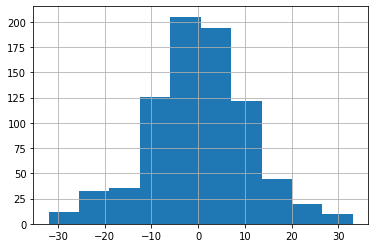

In [16]:
bw_diff.value.hist()

In [17]:
# If the population is large enough, this mean should be around 9
bw_diff.value.mean()

0.22767621119133252

In [18]:
bw_diff.measure.unique()

array(['birth_weight_mean'], dtype=object)

In [19]:
bw_mean.measure.unique()

array(['birth_weight_mean'], dtype=object)

## Now compare difference in mean BW between each scenario and baseline

In [20]:
bw_mean = data['Nigeria']['birth_weight'].query('measure=="birth_weight_mean"')
# index_columns = ['year', 'sex', 'measure', 'input_draw', 'scenario']
# bw_mean = bw_mean.groupby(index_columns).sum().reset_index()
# bw_mean = bw_mean.query('scenario in ["baseline", "iron_folic_acid_fortification_scale_up"]')
bw_mean.head()
bw_diff = lop.averted(bw_mean, 'baseline')
bw_diff.head()

['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group']
baseline index: ['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group']
intervention index: ['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group', 'scenario']
averted index: ['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group', 'scenario']
Index(['year', 'sex', 'measure', 'input_draw', 'iron_fortification_group',
       'scenario', 'value'],
      dtype='object')


,year,sex,measure,input_draw,iron_fortification_group,scenario,relative_to,value
0,2020,female,birth_weight_mean,21,covered,folic_acid_fortification_scale_up,baseline,0.000000e+00
1,2020,female,birth_weight_mean,21,covered,iron_folic_acid_fortification_scale_up,baseline,4.547474e-13
2,2020,female,birth_weight_mean,21,covered,vitamin_a_fortification_scale_up,baseline,-4.547474e-13
3,2020,female,birth_weight_mean,21,uncovered,folic_acid_fortification_scale_up,baseline,0.000000e+00
4,2020,female,birth_weight_mean,21,uncovered,iron_folic_acid_fortification_scale_up,baseline,9.094947e-13


### Plot histogram of mean differences from baseline for `'iron_folic_acid_fortification_scale_up'` scenario

Hmm, it's hard to tell whether this graph looks reasonable, because the results are still stratified by `iron_fortification_group`. If we aggregated across this variable for each scenario, then I think we'd expect the difference from baseline to be strictly positive in the `'iron_folic_acid_fortification_scale_up'` scenario, but we don't have the data to aggregate correctly. So it's possible the below graph is just a graph of random noise - perhaps approximately normal? If so, the shape might actually be reasonable...

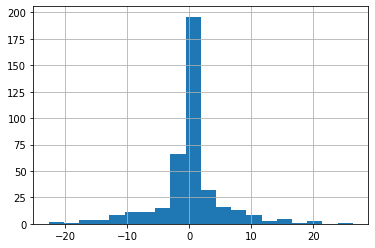

In [21]:
bw_diff.query('scenario == "iron_folic_acid_fortification_scale_up"').value.hist(bins=20)

In [22]:
bw_diff.query('scenario == "iron_folic_acid_fortification_scale_up"').value.mean()

0.009040709315761432

In [23]:
bw_diff.query('scenario=="iron_folic_acid_fortification_scale_up"').head()

,year,sex,measure,input_draw,iron_fortification_group,scenario,relative_to,value
1,2020,female,birth_weight_mean,21,covered,iron_folic_acid_fortification_scale_up,baseline,4.547474e-13
4,2020,female,birth_weight_mean,21,uncovered,iron_folic_acid_fortification_scale_up,baseline,9.094947e-13
7,2020,female,birth_weight_mean,29,covered,iron_folic_acid_fortification_scale_up,baseline,0.000000e+00
10,2020,female,birth_weight_mean,29,uncovered,iron_folic_acid_fortification_scale_up,baseline,0.000000e+00
13,2020,female,birth_weight_mean,55,covered,iron_folic_acid_fortification_scale_up,baseline,4.547474e-13


### Aggregate over coverage groups with a simple mean rather than weighted average

Since we can't do the correct weighted average, let's do a simple approximation by computing the unweighted mean of the `covered` and `uncovered` groups.

This still has a lot of negative values, which doesn't seem right.

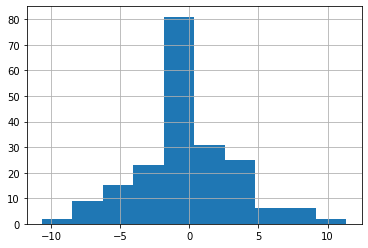

In [24]:
bw_diff_iron = bw_diff.query('scenario=="iron_folic_acid_fortification_scale_up"')
index_cols = bw_diff_iron.columns.difference(['iron_fortification_group', 'value'])
bw_diff_iron = bw_diff_iron.groupby(index_cols.to_list()).value.mean()
bw_diff_iron.hist()

In [25]:
bw_diff_iron.mean()

0.009040709315761432

### Plot histogram of mean differences from baseline for all other scenarios

These are all essentially 0, which is what we expect.

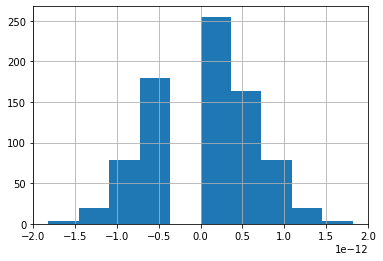

In [26]:
bw_diff.query('scenario != "iron_folic_acid_fortification_scale_up"').value.hist()

In [27]:
bw_diff.query('scenario != "iron_folic_acid_fortification_scale_up"').value.mean()

-6.252776074688882e-15

In [28]:
bw_mean.scenario.unique()

array(['baseline', 'folic_acid_fortification_scale_up',
       'iron_folic_acid_fortification_scale_up',
       'vitamin_a_fortification_scale_up'], dtype=object)

# 3. Identify and fix error in `averted` function

When I first ran the above code to calculate birthweight differences, I got an error in my `averted` function. The error has now been fixed by using `df[['value']]` instead of `df['value']` to subtract DataFrames instead of series. The remainder of the notebook demonstrates what the original problem was and shows that the fix works on some small example dataframes.

## The following function demonstrates the error I found in my `averted` function

The function calculates the difference in mean birthweights between the covered and uncovered groups, using the same method as in my more general `averted` function in `lsff_output_processing.py`. It lines up the values in all the columns except `'value'` and `'iron_fortification_group'` and subtracts the uncovered means from covered means. The intention is to record both values of `'iron_fortification_group'` (i.e. covered and uncovered), in different columns, to record what got subtracted from what. However, after the subtraction, the `'iron_fortification_group'` column is missing from the index, so I can't record it.

In [29]:
def calculate_bw_effect_size(birthweight_df, scenario):
    
#     covered_mean = birthweight_df.query('iron_fortification_group=="covered"')
#     uncovered_mean = birthweight_df.query('iron_fortification_group=="uncovered"')
    splitting_column = 'iron_fortification_group'
    largest_value = 'covered'
    birthweight_df = birthweight_df.query('measure=="birth_weight_mean"')
    covered_mean = birthweight_df[birthweight_df[splitting_column] == largest_value]
    uncovered_mean = birthweight_df[birthweight_df[splitting_column] != largest_value]
    
    index_columns = sorted(set(covered_mean.columns) - set([splitting_column, 'value']),
                           key=covered_mean.columns.get_loc)
    print(index_columns)
    
    covered_mean = covered_mean.set_index(index_columns)
    uncovered_mean = uncovered_mean.set_index(index_columns + [splitting_column])
    
    effect_size = covered_mean['value'] - uncovered_mean['value']
    
    return covered_mean, uncovered_mean, effect_size

c,u,e = calculate_bw_effect_size(all_data['birth_weight'].query('measure=="birth_weight_mean"'), scenario)

['location', 'year', 'sex', 'measure', 'input_draw', 'scenario']


### Here's the `covered` dataframe (the minuend)

It does not contain `iron_fortification_group` in the index, because I don't want to *match* the value of this column when subtracting, but rather *broadcast* over all values of `iron_fortification_group` in the subtrahend (in this case it so happens that there is only one such value, `'uncovred'`, so no actual broadcasting will happen).

In [30]:
c.head()

value  \
location year sex    measure           input_draw scenario                                              
India    2020 female birth_weight_mean 21         baseline                                2897.547480   
                                                  folic_acid_fortification_scale_up       2897.547480   
                                                  iron_folic_acid_fortification_scale_up  2897.547480   
                                                  vitamin_a_fortification_scale_up        2897.547480   
                                       29         baseline                                2922.724278   

                                                                                         iron_fortification_group  
location year sex    measure           input_draw scenario                                                         
India    2020 female birth_weight_mean 21         baseline                                                covered  
                                                  folic_acid_fortification_scale_up                       covered  
                                                  iron_folic_acid_fortification_scale_up                  covered  
                                                  vitamin_a_fortification_scale_up                        covered  
                                       29         baseline                                                covered

### Here's the `uncovered` dataframe (the subtrahend)

This dataframe **does** contain `iron_fortification_group` in the index, because I want to record the vaue of `iron_fortification_group` describing the mean that gets subtracted in each row.

In [31]:
u.head()

value
location year sex    measure           input_draw scenario                               iron_fortification_group             
India    2020 female birth_weight_mean 21         baseline                               uncovered                 2912.186341
                                                  folic_acid_fortification_scale_up      uncovered                 2912.186341
                                                  iron_folic_acid_fortification_scale_up uncovered                 2912.186341
                                                  vitamin_a_fortification_scale_up       uncovered                 2912.186341
                                       29         baseline                               uncovered                 2903.992955

### Here's the `effect_size` dataframe (the difference `covered - uncovered`)

This Series is **missing** the `iron_fortification_group` in the index, even though it was included in the index of `uncovered`. This missing index level threw an error in my `averted` function when I tried to access it.

Below, I replicate the behavior for smaller dataframes. It looks like the problem is that if the index column is not used either for matching the index of the other dataframe or for broadcasting, then it is dropped from the index of the series when subtracting. **However**, if we do the same subtraction with DataFrame objects instead of Series (by using `[['value']]` instead of `['value']`), then the column is kept. I added this change to my `averted` function to fix the bug.

In [32]:
e.head()

location  year  sex     measure            input_draw  scenario                              
India     2020  female  birth_weight_mean  21          baseline                                 -14.638860
                                                       folic_acid_fortification_scale_up        -14.638860
                                                       iron_folic_acid_fortification_scale_up   -14.638860
                                                       vitamin_a_fortification_scale_up         -14.638860
                                           29          baseline                                  18.731323
Name: value, dtype: float64

In [33]:
c.shape

(2400, 2)

In [34]:
u.shape

(2400, 1)

In [35]:
e.shape

(2400,)

In [36]:
bw_mean.input_draw.nunique()

25

In [37]:
3*4*2*1*25*4

2400

In [38]:
bw_mean = all_data['birth_weight'].query('measure=="birth_weight_mean"')
bw_mean.iron_fortification_group.unique()

array(['uncovered', 'covered'], dtype=object)

In [39]:
bw_diff.shape

(1200, 8)

# 4. Feature or bug?

Demonstrate the strange behavior in `pandas` that led to the bug in my `averted` function.

## I think I found the problem - Series and DataFrames have different behavior...

Define some simple dataframes. `d` will be the "value" column, and `a`, `b`, and `c` will be "index" columns.

In [40]:
df1 = pd.DataFrame({'a':[1,2,1,2], 'b':[3,3,4,4], 'c':[5,5,5,5], 'd':[2,3,56,4]})
df2 = df1.assign(c=[6,6,6,6], d=[1,2,3,4])
df3 = pd.concat([df1, df2])
df3

,a,b,c,d
0,1,3,5,2
1,2,3,5,3
2,1,4,5,56
3,2,4,5,4
0,1,3,6,1
1,2,3,6,2
2,1,4,6,3
3,2,4,6,4


In [41]:
df1

,a,b,c,d
0,1,3,5,2
1,2,3,5,3
2,1,4,5,56
3,2,4,5,4


In [42]:
df2

,a,b,c,d
0,1,3,6,1
1,2,3,6,2
2,1,4,6,3
3,2,4,6,4


In [43]:
# This demonstrates the expected behavior of adding df1['d']+df2['d'],
# matching on 'a' and 'b' columns and recording the value of 'c' for the subtrahend in the index,
# except that there's an extraneous 'c' column in the dataframe because I didn't subset to 'd' only.
df1.set_index(['a','b']) + df3.set_index(['a','b','c']).query('c==6')

,,,c,d
a,b,c,,
1,3,6,NaN,3
2,3,6,NaN,5
1,4,6,NaN,59
2,4,6,NaN,8


## Define functions to add `df1` to `df2`

The functions match the values of the a and b columns, and use the c column as an identifier. The first function adds Series objects, whereas the second function adds DataFrame objects. The below code shows that Series and DataFrames behave differently: Series will drop the `c` column from the index if it is not needed for broadcasting, but DataFrames will keep it.

Is this a feature of pandas or a bug?

In [44]:
def add_as_series(df1, df2):
    return df1.set_index(['a','b'])['d'] + df2.set_index(['a','b','c'])['d']

def add_as_dataframes(df1, df2):
    return df1.set_index(['a','b'])[['d']] + df2.set_index(['a','b','c'])[['d']]

In [45]:
# The c column is missing from the index.
# This was the surprising behavior in my `averted` function.
# Is this the intended behavior, or is it a bug in pandas?
add_as_series(df1, df2)

a  b
1  3     3
2  3     5
1  4    59
2  4     8
Name: d, dtype: int64

In [46]:
# Now the c column *is* included in the index because it was needed for broadcasting
add_as_series(df1, df3)

a  b  c
1  3  5      4
      6      3
   4  5    112
      6     59
2  3  5      6
      6      5
   4  5      8
      6      8
Name: d, dtype: int64

In [47]:
# When adding as dataframes, the c column is included in the index,
# even when the column only contains one value and hence broadcasting isn't necessary.
# This is the behavior I expected in my `averted` function.
add_as_dataframes(df1, df2)

,,,d
a,b,c,
1,3,6,3
2,3,6,5
1,4,6,59
2,4,6,8


In [48]:
# Broadcast over c in df3 - same result with DataFrames as with Series addition above
add_as_dataframes(df1, df3)

d
a b c     
1 3 5    4
    6    3
  4 5  112
    6   59
2 3 5    6
    6    5
  4 5    8
    6    8

In [49]:
# This results in a dataframe even though there's only one column
df3.set_index(['a','b','c'])

,,,d
a,b,c,
1,3,5,2
2,3,5,3
1,4,5,56
2,4,5,4
1,3,6,1
2,3,6,2
1,4,6,3
2,4,6,4


## Define similar functions as above, but only match on `a` column, and use `b` as identifier

Strangely, when we only have one column in the index instead of two, both DataFrames *and* series appear to include the "identifier" column in all cases, in contrast to the above behavior where Series dropped this column.

Is this a feature of pandas, or a bug?

In [50]:
df1_sub = df1.query('b==3')
df1_sub

,a,b,c,d
0,1,3,5,2
1,2,3,5,3


In [51]:
df2_sub = df2.query('b==4')
df2_sub

,a,b,c,d
2,1,4,6,3
3,2,4,6,4


In [52]:
df2

,a,b,c,d
0,1,3,6,1
1,2,3,6,2
2,1,4,6,3
3,2,4,6,4


In [53]:
def add_as_series_simple_index(df1, df2):
    return df1.set_index(['a'])['d'] + df2.set_index(['a','b'])['d']

def add_as_dataframes_simple_index(df1, df2):
    return df1.set_index(['a'])[['d']] + df2.set_index(['a','b'])[['d']]

In [54]:
# Weird, now the 'b' column is included, even though this should be analogous to the
# situation above where the 'c' column was excluded from the Series.
# Feature, or bug?
add_as_series_simple_index(df1_sub, df2_sub)

a  b
1  4    5
2  4    7
Name: d, dtype: int64

In [55]:
# broadcast over b in df2
add_as_series_simple_index(df1_sub, df2)

a  b
1  3    3
2  3    5
1  4    5
2  4    7
Name: d, dtype: int64

In [56]:
# no broadcasting necessary - same result as Series addition above
add_as_dataframes_simple_index(df1_sub, df2_sub)

,,d
a,b,
1,4,5
2,4,7


In [57]:
# broadcast over b in df2 - same result as Series addition above
add_as_dataframes_simple_index(df1_sub, df2)

,,d
a,b,
1,3,3
2,3,5
1,4,5
2,4,7
